In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [44]:

train_data = pd.read_csv("dreaddit-train.csv")  

test_data = pd.read_csv("dreaddit-test.csv")  
train_data


,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.800000,1521614353,5,1.806818,...,1.0000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.000000,1527009817,4,9.429737,...,1.1250,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.800000,1535935605,2,7.769821,...,1.0000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.600000,1516429555,0,2.667798,...,1.0000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.800000,1539809005,24,7.554238,...,1.0000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1713,0,1.000000,1515187044,13,-1.369333,...,1.4000,1.0000,1.0,1.71133,1.45301,2.00304,0.84,16,0.254444,0.552066
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133,1,1.000000,1539827412,33,9.425478,...,1.0000,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6,8.640664,-0.220370
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442,0,1.000000,1539269312,2,11.060675,...,1.1250,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1,9.951524,0.045455
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834,0,0.571429,1488938143,4,2.421912,...,1.1111,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7,4.036765,0.159722


In [39]:
text_column = "text"
numeric_columns = train_data.columns[6:]  



Index(['confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       'lex_liwc_WC', 'lex_liwc_Analytic', 'lex_liwc_Clout',
       'lex_liwc_Authentic', 'lex_liwc_Tone', 'lex_liwc_WPS',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=110)

In [23]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), sublinear_tf=True)
text_tfidf_train = tfidf_vectorizer.fit_transform(train_data[text_column])



In [24]:
numeric_scaler = StandardScaler()
numeric_data_train = numeric_scaler.fit_transform(train_data[numeric_columns])



In [40]:
X_train = pd.concat([pd.DataFrame(text_tfidf_train.toarray()), pd.DataFrame(numeric_data_train)], axis=1)
y_train = train_data["label"]
X_train


,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,-0.751256,0.057521,-0.03253,0.987748,-0.138799,0.274512,0.094319,-0.410594,-0.865851,-0.222464
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.315859,-1.409415,-0.03253,-0.562426,0.816392,0.166402,-1.107307,-0.364710,1.332927,1.289893
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,-0.751256,0.267587,-0.03253,2.260672,0.433986,-0.358196,-0.992867,-0.456477,0.943775,-0.147585
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,-0.751256,0.057521,-0.03253,0.644008,-0.148220,1.851531,-1.965611,-0.227058,-0.530417,0.516386
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,-0.751256,0.057521,-0.03253,1.122400,1.090983,-1.100203,0.895403,-0.410594,0.971103,-1.253005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,2.663512,-1.409415,-0.03253,-0.238968,-0.809977,2.098640,-0.020122,0.277663,-2.048761,2.616071
2834,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,-0.751256,-1.409415,-0.03253,-1.520674,0.311017,-1.088153,0.666522,-0.181175,1.258914,-1.335907
2835,0.0,0.076002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.315859,0.057521,-0.03253,1.566502,-0.443500,0.737842,0.895403,-0.410594,1.775940,0.024120
2836,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151647,...,0.197196,0.267587,-0.03253,-0.132542,0.387265,0.345115,-0.535104,-0.135291,-0.556946,0.608742


In [27]:
text_tfidf_test = tfidf_vectorizer.transform(test_data[text_column])

numeric_data_test = numeric_scaler.transform(test_data[numeric_columns])



In [28]:
X_test = pd.concat([pd.DataFrame(text_tfidf_test.toarray()), pd.DataFrame(numeric_data_test)], axis=1)
y_test = test_data["label"]



In [41]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  
model.add(Dense(2, activation='softmax'))




In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [31]:
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)



Epoch 1/15
71/71 [==============================] - 2s 16ms/step - loss: 0.5570 - accuracy: 0.7070 - val_loss: 0.4500 - val_accuracy: 0.7835
Epoch 2/15
71/71 [==============================] - 1s 13ms/step - loss: 0.4490 - accuracy: 0.7885 - val_loss: 0.4506 - val_accuracy: 0.7764
Epoch 3/15
71/71 [==============================] - 1s 13ms/step - loss: 0.3998 - accuracy: 0.8176 - val_loss: 0.4581 - val_accuracy: 0.7870
Epoch 4/15
71/71 [==============================] - 1s 14ms/step - loss: 0.3564 - accuracy: 0.8392 - val_loss: 0.4547 - val_accuracy: 0.7782
Epoch 5/15
71/71 [==============================] - 1s 14ms/step - loss: 0.2961 - accuracy: 0.8687 - val_loss: 0.4971 - val_accuracy: 0.7817
Epoch 6/15
71/71 [==============================] - 1s 14ms/step - loss: 0.2456 - accuracy: 0.8969 - val_loss: 0.5124 - val_accuracy: 0.7870
Epoch 7/15
71/71 [==============================] - 1s 13ms/step - loss: 0.1919 - accuracy: 0.9203 - val_loss: 0.5179 - val_accuracy: 0.7852
Epoch 8/15
71

In [33]:
y_pred_test = model.predict(X_test)
predicted_labels_test = tf.argmax(y_pred_test, axis=1).numpy()

y_pred_test


23/23 [==============================] - 0s 2ms/step


array([[9.9999154e-01, 8.4615085e-06],
       [9.9999821e-01, 1.7609963e-06],
       [3.3063468e-02, 9.6693659e-01],
       ...,
       [3.0009558e-03, 9.9699903e-01],
       [9.9999905e-01, 9.6696840e-07],
       [3.3321094e-02, 9.6667898e-01]], dtype=float32)

In [35]:
atrain_loss, accuracy = model.evaluate(X_combined_train, y_combined_train)
print(f"Accuracy: {accuracy:.4f}")

89/89 [==============================] - 0s 3ms/step - loss: 0.1763 - accuracy: 0.9553
Accuracy: 0.9553


23/23 [==============================] - 0s 3ms/step


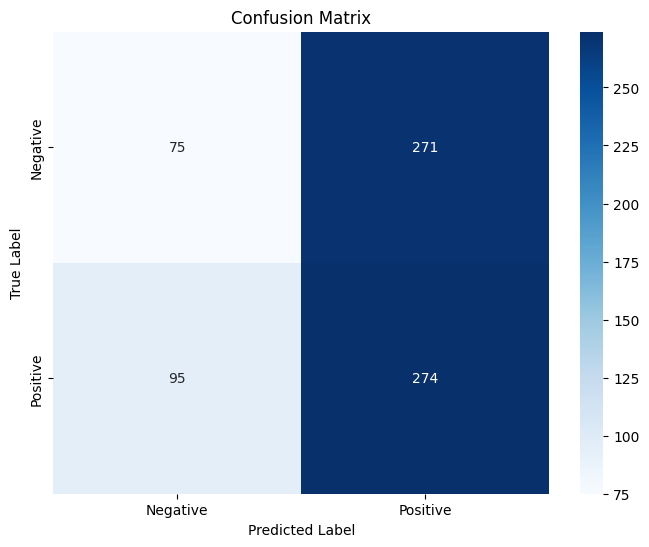

In [43]:

y_pred_test = model.predict(X_combined_test)
predicted_labels_test = tf.argmax(y_pred_test, axis=1).numpy()

cm = confusion_matrix(y_combined_test, predicted_labels_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
